In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
skin= pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt",header=None)

In [3]:
skin.describe()

,0,1,2,3
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [4]:
skin_clean=skin
skin_clean.fillna(skin.mean(),inplace=True)


In [5]:
skin_clean.shape

(245057, 4)

In [6]:
skin.head(10)

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
5,69,80,118,1
6,70,81,119,1
7,70,81,119,1
8,76,87,125,1
9,76,87,125,1


In [7]:
target=skin_clean.iloc[:,-1]

In [8]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 3, dtype: int64

In [9]:
features=skin_clean.drop([3],axis=1)

In [10]:
features.head()

,0,1,2
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


In [11]:
X1=features[0]
X2=features[1]
X3=features[2]
Y=target
X1.head()

0    74
1    73
2    72
3    70
4    70
Name: 0, dtype: int64

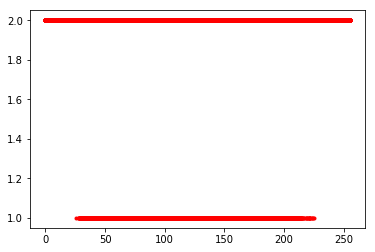

In [12]:
plt.plot(X1,Y,'r.')

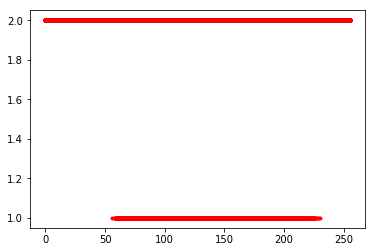

In [13]:
plt.plot(X2,Y,'r.')

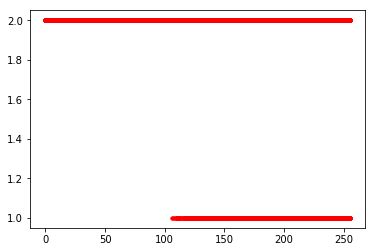

In [14]:
plt.plot(X3,Y,'r.')

In [15]:
x1=np.array(X1)
x2=np.array(X2)
x3=np.array(X3)
y=np.array(Y)

In [16]:
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())
x3=(x3-x3.min())/(x3.max()-x3.min())


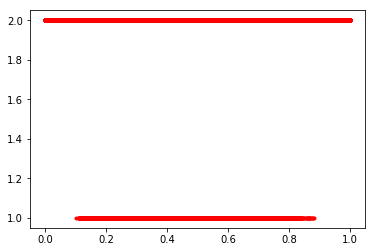

In [17]:
plt.plot(x1,y,'r.')

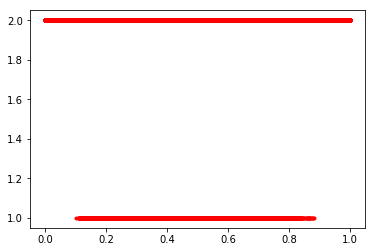

In [18]:
plt.plot(x1,Y,'r.')

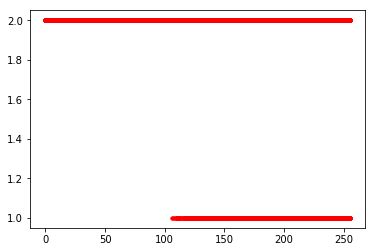

In [19]:
plt.plot(X3,Y,'r.')

In [20]:
x1_train,x1_test,x2_train,x2_test,x3_train,x3_test,y_train,y_test=train_test_split(x1,x2,x3,y,test_size=0.25)
print(x1_train)
print(x2_train)
print(y_train)

[0.00392157 0.20392157 0.46666667 ... 0.14509804 0.38039216 0.1372549 ]
[0.00392157 0.21176471 0.6        ... 0.4        0.58431373 1.        ]
[2 2 1 ... 2 1 2]


In [21]:
def hypothesis(a,x1,b,x2,c,x3,d):
    
    f=a*x1+b*x2+c*x3+d
    return (1/(1+np.exp(-(f))))

In [22]:
def error(a,x1,b,x2,c,x3,d,y):
    e=0
    m=len(x1)
    for i in range(m):
        e+= (y[i] - hypothesis(a,x1[i],b,x2[i],c,x3[i],d))**2
    return (1/m)*e

In [23]:
def step_gradient(a,x1,b,x2,c,x3,d,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    m=len(x1)
    for i in range(m):
        grad_a+=(hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x1[i]
        grad_b+=(hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x2[i]
        grad_c+=(hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])*x3[i]
        grad_d+=(hypothesis(a,x1[i],b,x2[i],c,x3[i],d)-y[i])
                
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    d=d-(grad_d*learning_rate)
    
    
    return a,b,c,d

In [24]:
def descend(init_a,x1,init_b,x2,init_c,x3,init_d,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    d=init_d
    
    for i in range(iterations):
        e=error(a,x1,b,x2,c,x3,d,y)
        
        if i%100==0:
            print(f"error:{e},a:{a},b:{b},c:{c},d:{d}")
        a,b,c,d=step_gradient(a,x1,b,x2,c,x3,d,y,learning_rate)
    return a,b,c,d

In [26]:
init_a=0
init_b=0
init_c=0
init_d=0
iterations=10000
learning_rate=0.001

In [ ]:
final_a,final_b,final_c,final_d=descend(init_a,x1_train,init_b,x2_train,init_c,x3_train,init_d,y_train,learning_rate,iterations)

error:1.8364781927396188,a:0,b:0,c:0,d:0
error:0.7932390963698094,a:7362.252505882061,b:7413.725737253659,c:5879.8951941178875,d:14670.995999999974
